In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [82]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\Sample_SuperStore_Data.xlsx")

In [83]:
# Clean Nulls
df = df.dropna(subset=['Order ID', 'Sales'])

In [84]:
# GroupBy
sales_cat = df.groupby('Category')['Sales'].sum()

In [85]:
# Pivot
monthly = pd.pivot_table(df,
                         index=df['Order Date'].dt.to_period('M'),
                         columns='Category',
                         values='Profit',
                         aggfunc='sum')

In [86]:
# Low Margin Products
df['Profit_Margin'] = df['Profit'] / df['Sales']
low_margin_products = df[df['Profit_Margin'] < 0.05]

In [87]:
# Ad-spend inefficiencies
high_discount_low_profit = df[(df['Discount'] > 0.3) & (df['Profit'] < 0)]

[]

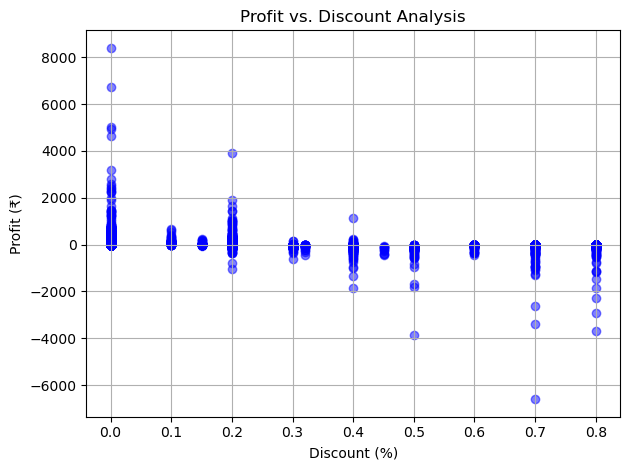

In [88]:
plt.scatter(df['Discount'], df['Profit'],alpha=0.5, color='blue')
plt.xlabel("Discount (%)")
plt.ylabel("Profit (₹)")
plt.title("Profit vs. Discount Analysis")
plt.grid(True)
plt.tight_layout()
plt.plot()

In [89]:
# Quarterly Loss Calculation after adding Quarter column

df['Quarter'] = df['Order Date'].dt.to_period('Q')
quarterly_loss = df[df['Profit'] < 0].groupby('Quarter')['Profit'].sum()

In [90]:
# Some products have high discounts (e.g., 30%–70%) and still end up with very low or even negative profit.
# Recover 10% of the discount amount — without impacting the sales volume by adding the discout to the profit margin

df['Adjusted_Profit'] = df['Profit'] + (df['Discount'] * df['Sales'] * 0.1)

# Group by Quarter and calculate total Profit and Adjusted_Profit
profit_comparison = df.groupby('Quarter')[['Profit', 'Adjusted_Profit']].sum()

# Calculate percentage change between original and adjusted profit
profit_comparison['% Change'] = (
    (profit_comparison['Adjusted_Profit'] - profit_comparison['Profit']) 
    / profit_comparison['Profit']
) * 100

profit_comparison['% Change']

Quarter
2014Q1    46.818051
2014Q2    10.460792
2014Q3    17.761926
2014Q4    11.622824
2015Q1    10.264677
2015Q2    10.196894
2015Q3     9.810177
2015Q4    10.462157
2016Q1     9.762872
2016Q2    11.982163
2016Q3    14.654096
2016Q4     7.056730
2017Q1     5.590334
2017Q2    11.830335
2017Q3    10.493161
2017Q4    15.104460
Freq: Q-DEC, Name: % Change, dtype: float64

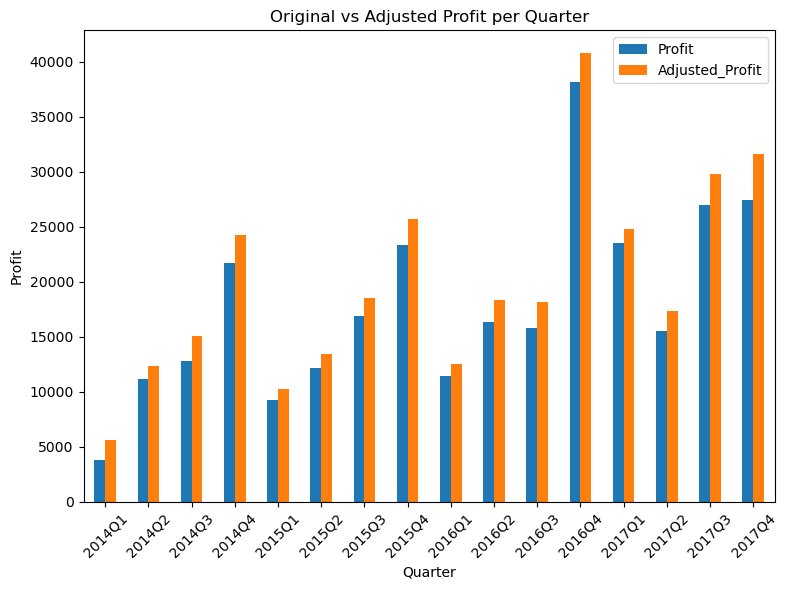

In [91]:
profit_comparison[['Profit', 'Adjusted_Profit']].plot(kind='bar', figsize=(8, 6))
plt.title("Original vs Adjusted Profit per Quarter")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()